In [2]:
import pandas as pd
import seaborn as sns
import sourmash
import sourmash.lca.lca_utils as lca_utils
import sourmash.tax.tax_utils as tax_utils
from tqdm import tqdm
tqdm.pandas()

In [12]:
ascending_taxlist = list(tax_utils.ascending_taxlist(include_strain=False))[:-1]
ascending_taxlist

['species', 'genus', 'family', 'order', 'class', 'phylum']

In [3]:
#gtdb_taxonomy = pd.read_csv('gtdb-rs202.taxonomy.v2.with-strain.csv')
#gtdb_taxonomy

In [4]:
phylum_compare = pd.read_csv('gtdb-rs202.most-phyla.compare.with-lineages.csv')
phylum_compare

,Unnamed: 0,g1,g2,similarity,max_containment,lca_rank,lca_lin
0,0,GCA_002084765.1,GCA_002084765.1,0.000000,1.000000,species,d__Bacteria;p__4572-55;c__4572-55;o__4572-55;f...
1,1,GCA_003697105.1,GCA_003697105.1,0.000000,1.000000,species,d__Bacteria;p__4572-55;c__4572-55;o__J002;f__J...
2,2,GCA_002084765.1,GCA_003697105.1,0.005815,0.008694,class,d__Bacteria;p__4572-55;c__4572-55
3,4,GCA_013202285.1,GCA_013202315.1,0.004995,0.007092,phylum,d__Bacteria;p__AABM5-125-24
4,5,GCA_003818605.1,GCA_013202285.1,0.003438,0.005674,phylum,d__Bacteria;p__AABM5-125-24
...,...,...,...,...,...,...,...
18311089,18311251,GCA_003520965.1,GCA_008501655.1,0.005957,0.010126,class,d__Bacteria;p__Zixibacteria;c__MSB-5A5
18311090,18311252,GCA_012517955.1,GCA_903827795.1,0.008479,0.014914,class,d__Bacteria;p__Zixibacteria;c__MSB-5A5
18311091,18311253,GCA_903823345.1,GCF_900498245.1,0.013791,0.020692,class,d__Bacteria;p__Zixibacteria;c__MSB-5A5
18311092,18311254,GCA_903823345.1,GCA_903921635.1,0.850266,0.987619,species,d__Bacteria;p__Zixibacteria;c__MSB-5A5;o__CAIY...


In [7]:
pcomp = phylum_compare.query("g1 != g2")
pcomp.shape

(18284460, 7)

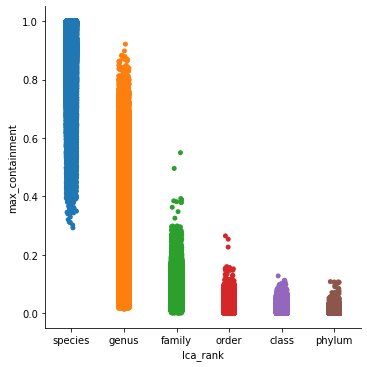

In [13]:
g = sns.catplot(data=pcomp, x="lca_rank", y="max_containment", order=ascending_taxlist)

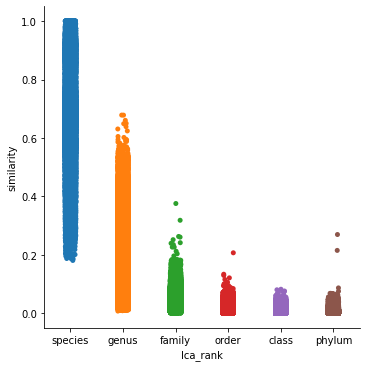

In [14]:
g = sns.catplot(data=pcomp, x="lca_rank", y="similarity", order=ascending_taxlist)

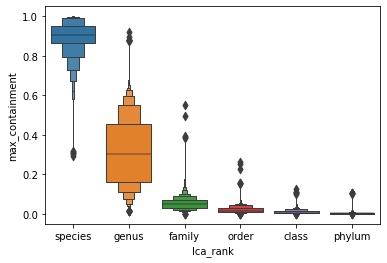

In [15]:
g = sns.boxenplot(data=pcomp, x="lca_rank", y="max_containment", order=ascending_taxlist)